# New Data Sources
In this notebook we are going to look into adding new data to your dataset.
We start out with a taxi dataset describing all pickup points from taxis in a specific date interval, notice that the dataset is divided up into months. Each month has their specific csv file saved in an AWS location.




In [1]:
import pandas as pd
import seaborn as sns
from urllib.request import urlopen

In [2]:
data_url_files = urlopen('https://raw.githubusercontent.com/toddwschneider/nyc-taxi-data/master/setup_files/raw_data_urls.txt')
data_urls = data_url_files.read().decode('utf-8').split('\n')
data_urls[0:12]

['https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-06.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-07.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-08.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-09.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-10.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-11.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-12.csv']

Due to slow parsing of data we will here only parse the uber data from jan-mar 2015

In [3]:
datasets = [pd.read_csv(url) for url in data_urls[0:3]]

In [4]:
cab_df = pd.concat(datasets)

In [5]:
print('shape: ' + str(cab_df.shape))
cab_df.head()

shape: (9153861, 3)


,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN


We would like to find out how many uber rides were performed each day so we:
- parse the date string to a datetime format
- set the date as index
- resample to '1D' or one day (and chose count as aggregation)

In [6]:
cab_df['datetime'] = pd.to_datetime(cab_df['Pickup_date'], format="%Y/%m/%d %H:%M:%S")


In [7]:
cab_df = cab_df.set_index('datetime')

In [8]:
cab_df.head()

,Dispatching_base_num,Pickup_date,locationID
datetime,,,
2015-01-01 00:30:00,B00013,2015-01-01 00:30:00,NaN
2015-01-01 01:22:00,B00013,2015-01-01 01:22:00,NaN
2015-01-01 01:23:00,B00013,2015-01-01 01:23:00,NaN
2015-01-01 01:44:00,B00013,2015-01-01 01:44:00,NaN
2015-01-01 02:00:00,B00013,2015-01-01 02:00:00,NaN


In [9]:
cabs_taken = cab_df['Dispatching_base_num'].resample('1D').count().rename('cabs_taken')
cabs_taken.head()

datetime
2015-01-01    77789
2015-01-02    61832
2015-01-03    81955
2015-01-04    62691
2015-01-05    71063
Freq: D, Name: cabs_taken, dtype: int64

great! now we have an idea on how many ubers were taken each day, let us use a simple line plot to show the results.

<AxesSubplot:xlabel='datetime', ylabel='cabs_taken'>

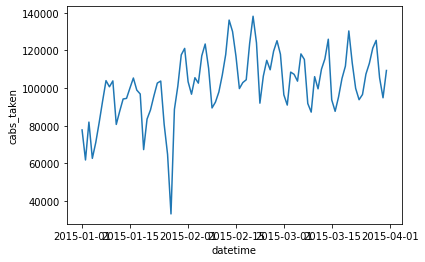

In [10]:
sns.lineplot(data=cabs_taken)

This dataset is nice, but by itself pretty useless, why don't we look up some weather information to see if this influences our traffic.

In [11]:
url = 'https://raw.githubusercontent.com/toddwschneider/nyc-taxi-data/master/data/central_park_weather.csv'
weather = pd.read_csv(url)

In [12]:
weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-01,11.18,0.0,0.0,0.0,26,15
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-02,6.26,0.0,0.0,0.0,34,23
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-03,10.07,0.0,0.0,0.0,38,29
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-04,7.61,0.0,0.0,0.0,42,25
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-05,6.93,0.0,0.0,0.0,43,38


you can see a variaty of information, more info on the column names can be found [here](https://docs.opendata.aws/noaa-ghcn-pds/readme.html)  
again we need to:
- parse the date
- set it to the index
- resampling is not needed as it is already in day-to-day intervals


In [13]:
weather['DATE'] =  pd.to_datetime(weather['DATE'], format="%Y/%m/%d")
weather = weather.set_index('DATE')

In [14]:
weather.head()

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,,
2009-01-01,USW00094728,"NY CITY CENTRAL PARK, NY US",11.18,0.0,0.0,0.0,26,15
2009-01-02,USW00094728,"NY CITY CENTRAL PARK, NY US",6.26,0.0,0.0,0.0,34,23
2009-01-03,USW00094728,"NY CITY CENTRAL PARK, NY US",10.07,0.0,0.0,0.0,38,29
2009-01-04,USW00094728,"NY CITY CENTRAL PARK, NY US",7.61,0.0,0.0,0.0,42,25
2009-01-05,USW00094728,"NY CITY CENTRAL PARK, NY US",6.93,0.0,0.0,0.0,43,38


Having 2 dataset, now we need to merge them. Since we already prepared the date as index, this should be easy.

In [15]:
merged_df = pd.merge(cabs_taken, weather, left_index=True, right_index=True)

In [16]:
merged_df.head()

,cabs_taken,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
2015-01-01,77789,USW00094728,"NY CITY CENTRAL PARK, NY US",7.16,0.00,0.0,0.0,39,27
2015-01-02,61832,USW00094728,"NY CITY CENTRAL PARK, NY US",7.16,0.00,0.0,0.0,42,35
2015-01-03,81955,USW00094728,"NY CITY CENTRAL PARK, NY US",6.49,0.71,0.0,0.0,42,33
2015-01-04,62691,USW00094728,"NY CITY CENTRAL PARK, NY US",6.49,0.30,0.0,0.0,56,41
2015-01-05,71063,USW00094728,"NY CITY CENTRAL PARK, NY US",10.51,0.00,0.0,0.0,49,21


One would assume that when it is a rainy day, people would use more cabs. so let us seperate based on precipitation.

In [17]:
rained = merged_df[merged_df['PRCP']>0]
no_rain = merged_df[merged_df['PRCP']==0]

In [18]:
print('average uber rides on a rainy day')
print(rained['cabs_taken'].mean())
print('average uber rides on a dry day')
print(no_rain['cabs_taken'].mean())

average uber rides on a rainy day
99837.29411764706
average uber rides on a dry day
102846.30357142857


ouch! it looks like the average new yorker doesn't mind getting wet, or they take a cab any day...  
using a regression plot we can see it more clear

<AxesSubplot:xlabel='PRCP', ylabel='cabs_taken'>

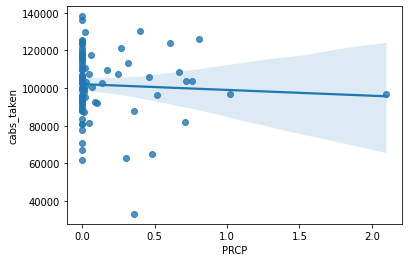

In [19]:
sns.regplot(data=merged_df, x='PRCP', y='cabs_taken')

Ok, here we see that it might just be because a lot of days are dry and the dataset is skewed. Not reliable info.  
What about temperatures, can we see a difference if the lowest temperature changes?

<AxesSubplot:xlabel='TMIN', ylabel='cabs_taken'>

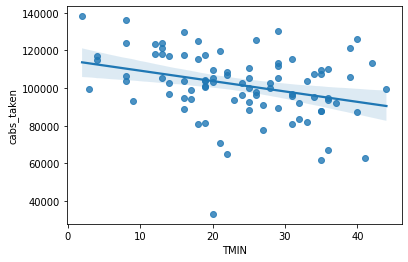

In [20]:
sns.regplot(data=merged_df, x='TMIN', y='cabs_taken')

Appearantly when the temperature lowers, yorkers seem to be taking more cab rides. So global warming might be disastrous for capitalism after all?